___
# Ciência dos Dados - PROJETO 1

# Rebeca Triñanes


___
## Introdução



## _Pergunta_

Este projeto tem o propósito de comparar como o passar dos anos influenciou no consumo de TV com sinal digital e no consumo de TV com sinal analógico (com antena) entre pessoas de diferentes classes sociais (1-3 salários mínimos, 4-6 salários mínimos, 7-9 salários mínimos) na área urbana da Bahia.


___
## Análise e Resultados

In [32]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [33]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/macbook


In [34]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
dados2015 = pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')
dados2014 = pd.read_csv('DOM2014csv.zip', compression='zip', header=0, sep=',', quotechar='"')
dados2013 = pd.read_csv('DOM2013.csv',sep=',')


Para esta análise serão primeiramente selecionadas as variáveis de interesse, ou seja, todas as colunas da PNAD que não interessam para os resultados deste projeto serão excluidas. Em seguida, serão definidas as condições fixas de cada variável, caso a mesma necessite (de acordo com a definição do projeto). A tabela atualizada mostra com que informações deseja-se trabalhar.

## _Tabela Atualizada - 2013_


In [35]:
#delimitando a tabela com os dados que eu quero
dados2013 = dados2013.loc[(dados2013.UF==29) & (dados2013.V0202==2) & (dados2013.V0207==1) & (dados2013.V4105==1),["UF","V0202","V0207","V4105","V0226","V02273","V02274","V4614"]]

#transformando int em categoria
dados2013.UF = dados2013.UF.astype("category")
dados2013.V0202 = dados2013.V0202.astype("category")
dados2013.V0207 = dados2013.V0202.astype("category")
dados2013.V4105 = dados2013.V4105.astype("category")
dados2013.V0226 = dados2013.V0226.astype("category")
dados2013.V02273 = dados2013.V02273.astype("category")
dados2013.V02274 = dados2013.V02274.astype("category")


#renomeando as linhas
dados2013.UF.cat.categories = ("Bahia")
dados2013.V0202.cat.categories = ("Casa")
dados2013.V0207.cat.categories = ("Próprio")
dados2013.V4105.cat.categories = ("Urbana")
dados2013.V0226.cat.categories = ("Sim","Não")
dados2013.V02273.cat.categories = ("Sim","Não","Não Sabe")
dados2013.V02274.cat.categories = ("Sim","Não","Não Sabe")

#renomemando as colunas

dados2013 = dados2013.rename(columns={"UF":"REGIAO","V4614": "RENDA","V0202":"DOMICILIO","V0207":"CONDOCUP","V4105":"AREA","V0226":"TVCOR","V02273":"TVDIGITAL","V02274":"TVANTENA"})

dados2013 = dados2013[pd.notnull(dados2013["TVDIGITAL"])]
dados2013 = dados2013[pd.notnull(dados2013["TVANTENA"])]
dados2013 = dados2013[dados2013.RENDA<9999999999]

#definindo uma nova variável: salário

dados2013.loc[(dados2013.RENDA >= 678) & (dados2013.RENDA < 2034),'SALARIO'] = '1-3 salários mínimos'
dados2013.loc[(dados2013.RENDA >= 2712) & (dados2013.RENDA < 4068),'SALARIO'] = '4-6 salários mínimos'
dados2013.loc[(dados2013.RENDA >= 4746) & (dados2013.RENDA < 6102),'SALARIO'] = '7-9 salários mínimos'
dados2013.loc[(dados2013.RENDA >= 2034) & (dados2013.RENDA < 2712),'SALARIO'] = 'Não convém'
dados2013.loc[(dados2013.RENDA >= 4068) & (dados2013.RENDA < 4746),'SALARIO'] = 'Não convém'
dados2013.loc[(dados2013.RENDA < 678),'SALARIO'] = 'Não convém'
dados2013.loc[(dados2013.RENDA > 6102),'SALARIO'] = 'Não convém'


dados2013


,REGIAO,DOMICILIO,CONDOCUP,AREA,TVCOR,TVDIGITAL,TVANTENA,RENDA,SALARIO
52166,Bahia,Casa,Próprio,Urbana,Sim,Sim,Sim,2658.0,Não convém
52168,Bahia,Casa,Próprio,Urbana,Sim,Não,Sim,1356.0,1-3 salários mínimos
52169,Bahia,Casa,Próprio,Urbana,Sim,Sim,Sim,5775.0,7-9 salários mínimos
52171,Bahia,Casa,Próprio,Urbana,Sim,Sim,Sim,1878.0,1-3 salários mínimos
52172,Bahia,Casa,Próprio,Urbana,Sim,Sim,Sim,1800.0,1-3 salários mínimos
52174,Bahia,Casa,Próprio,Urbana,Sim,Sim,Sim,3178.0,4-6 salários mínimos
52176,Bahia,Casa,Próprio,Urbana,Sim,Não,Sim,1378.0,1-3 salários mínimos
52177,Bahia,Casa,Próprio,Urbana,Sim,Não,Não,678.0,1-3 salários mínimos
52221,Bahia,Casa,Próprio,Urbana,Sim,Não,Sim,1228.0,1-3 salários mínimos
52223,Bahia,Casa,Próprio,Urbana,Sim,Não,Não,600.0,Não convém


Percebe-se que as variáveis: Região, Domicílio, Condição Ocupacional e Área foram definidas fixamente. O projeto apenas abrange pessoas que moram em casas próprias na região urbana da Bahia.

## _Gráficos  2013-1_

Gráficos para a visualização de qual a densidade/porcentagem da população que está inserida em cada faixa salarial.

Salário mínimo de 2013: **R$ 678,00**

Histograma:

- A faixa salarial de (1-3) salários mínimos está em <font color='red'>vermelho </font>

- A faixa salarial de (4-6) salários mínimos está em <font color='orange'>laranja </font>

- A faixa salarial de (7-9) salários mínimos está em <font color='yellow'>amarelo </font>


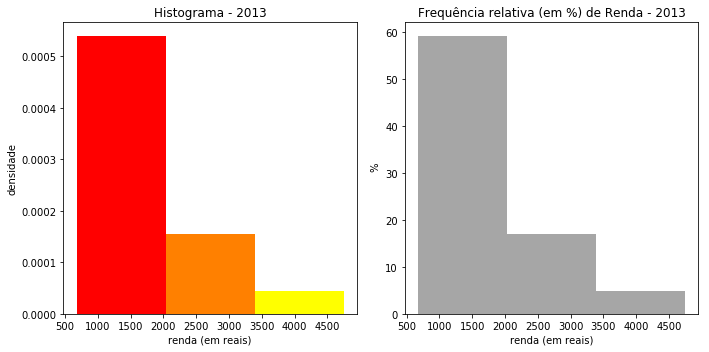

In [36]:
import numpy as n
import matplotlib.pyplot as plt
from numpy import zeros_like

#plotando o histograma
data1 = dados2013.RENDA
faixa = range(678,6102,1356)

fig = plt.figure(figsize=(10,5))

plt.subplot(121)

#colormap
cm = plt.cm.get_cmap('autumn')

n, bins, patches = plt.hist(data1, faixa, normed=1, color='green')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c)) 

plt.ylabel('densidade')
plt.xlabel('renda (em reais)')
plt.title('Histograma - 2013')

#plotando o gráfico de frequências absolutas
plt.subplot(122)

plot = dados2013.RENDA.plot.hist(bins=faixa,color='grey',title='Frequência relativa (em %) de Renda - 2013', weights=zeros_like(dados2013.RENDA)+1./dados2013.RENDA.size*100, alpha=0.7)
plt.ylabel(' %')
plt.xlabel('renda (em reais)')

plt.tight_layout()
plt.show()



In [71]:
#tabela com os valores exatos para uma visualização mais precisa

dados2013.SALARIO.value_counts(True)*100

1-3 salários mínimos    59.134385
Não convém              28.766141
4-6 salários mínimos     8.919177
7-9 salários mínimos     3.180297
Name: SALARIO, dtype: float64

## _Gráficos 2013-2_

Gráficos para a visualização de qual a porcentagem das pessoas que possuem TV's digitais e TV's com antena (dentro de cada faixa salarial).

- Os gráficos de (1-3) salários mínimos estão em <font color='red'>vermelho </font>

- Os gráficos de (4-6) salários mínimos estão em <font color='orange'>laranja </font>

- Os gráficos de (7-9) salários mínimos estão em <font color='yellow'>amarelo </font>




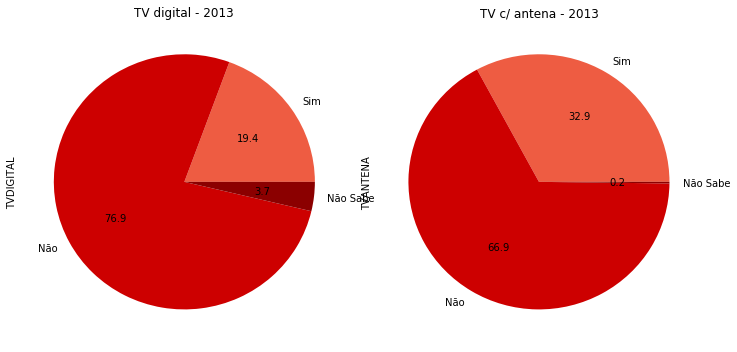

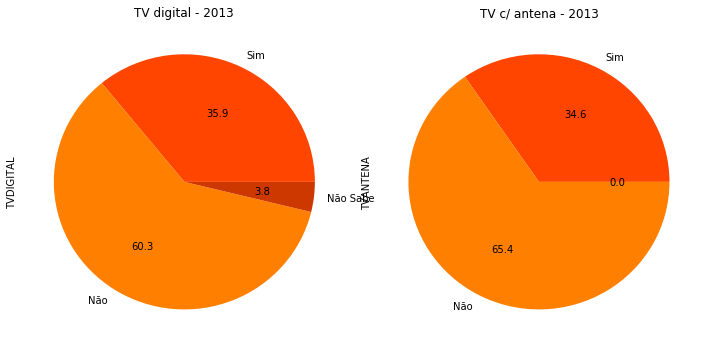

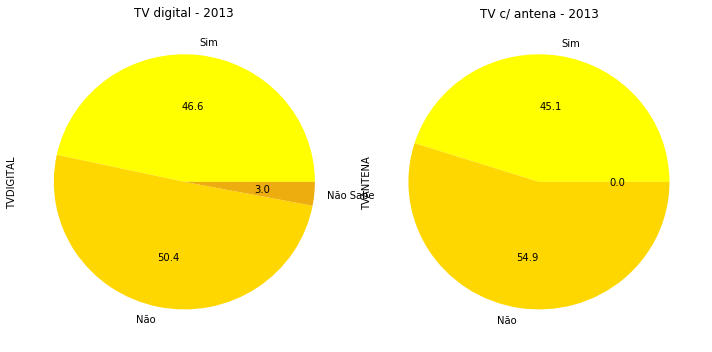

In [82]:
dados20131 = dados2013[(dados2013.RENDA >= 678) & (dados2013.RENDA < 2034)]

tv_aberta1 = (dados20131.TVDIGITAL.value_counts(sort=False, normalize=True)*100).round(decimals=1)

tv_antena1 = (dados20131.TVANTENA.value_counts(sort=False, normalize=True)*100).round(decimals=1)

dados20132 = dados2013[(dados2013.RENDA >= 2712) & (dados2013.RENDA < 4068)]

tv_aberta2 = (dados20132.TVDIGITAL.value_counts(sort=False, normalize=True)*100).round(decimals=1)

tv_antena2 = (dados20132.TVANTENA.value_counts(sort=False, normalize=True)*100).round(decimals=1)

dados20133 = dados2013[(dados2013.RENDA >= 4746) & (dados2013.RENDA < 6102)]

tv_aberta3 = (dados20133.TVDIGITAL.value_counts(sort=False, normalize=True)*100).round(decimals=1)

tv_antena3 = (dados20133.TVANTENA.value_counts(sort=False, normalize=True)*100).round(decimals=1)

#plotando o gráfico pie de tv digital(1-3 salários)
fig = plt.figure(figsize=(10, 5))

plt.subplot(121)
plot = tv_aberta1.plot(kind='pie',title='TV digital - 2013',autopct='%.1f',colors=('#EE5C42','#CD0000','#8B0000'))

#plotando o gráfico pie de tv com antena(1-3 salários)
plt.subplot(122)
plot = tv_antena1.plot(kind='pie',title='TV c/ antena - 2013',autopct='%.1f',colors=('#EE5C42','#CD0000','#8B0000'))

plt.tight_layout()
plt.show()

#plotando o gráfico pie de tv digital(4-6 salários)
fig = plt.figure(figsize=(10, 5))

plt.subplot(121)
plot = tv_aberta2.plot(kind='pie',title='TV digital - 2013',autopct='%.1f',colors=('#FF4500','#FF7F00','#CD3700'))

#plotando o gráfico pie de tv com antena(4-6 salários)
plt.subplot(122)
plot = tv_antena2.plot(kind='pie',title='TV c/ antena - 2013',autopct='%.1f',colors=('#FF4500','#FF7F00','#CD3700'))

plt.tight_layout()
plt.show()

#plotando o gráfico pie de tv digital(7-9 salários)
fig = plt.figure(figsize=(10, 5))

plt.subplot(121)
plot = tv_aberta3.plot(kind='pie',title='TV digital - 2013',autopct='%.1f',colors=('#FFFF00','#FFD700','#EEAD0E'))

#plotando o gráfico pie de tv com antena(7-9 salários)
plt.subplot(122)
plot = tv_antena3.plot(kind='pie',title='TV c/ antena - 2013',autopct='%.1f',colors=('#FFFF00','#FFD700','#EEAD0E'))

plt.tight_layout()
plt.show()

## _Tabela Atualizada - 2014_

In [38]:
#delimitando a tabela com os dados que eu quero
dados2014 = dados2014.loc[(dados2014.UF==29) & (dados2014.V0202==2) & (dados2014.V4105==1),["UF","V0202","V0207","V4105","V0226","V02273","V02274","V4614"]]

#transformando int em categoria
dados2014.UF = dados2014.UF.astype("category")
dados2014.V0202 = dados2014.V0202.astype("category")
dados2014.V0207 = dados2014.V0202.astype("category")
dados2014.V4105 = dados2014.V4105.astype("category")
dados2014.V0226 = dados2014.V0226.astype("category")
dados2014.V02273 = dados2014.V02273.astype("category")
dados2014.V02274 = dados2014.V02274.astype("category")


#renomeando as linhas
dados2014.UF.cat.categories = ("Bahia")
dados2014.V0202.cat.categories = ("Casa")
dados2014.V0207.cat.categories = ("Próprio")
dados2014.V4105.cat.categories = ("Urbana")
dados2014.V0226.cat.categories = ("Sim","Não")
dados2014.V02273.cat.categories = ("Sim","Não","Não Sabe")
dados2014.V02274.cat.categories = ("Sim","Não","Não Sabe")

#renomemando as colunas
dados2014 = dados2014.rename(columns={"UF":"REGIAO","V4614": "RENDA","V0202":"DOMICILIO","V0207":"CONDOCUP","V4105":"AREA","V0226":"TVCOR","V02273":"TVDIGITAL","V02274":"TVANTENA"})

dados2014 = dados2014[pd.notnull(dados2014["TVDIGITAL"])]
dados2014 = dados2014[pd.notnull(dados2014["TVANTENA"])]

dados2014.loc[(dados2014.RENDA >= 724) & (dados2014.RENDA < 2172),'SALARIO'] = '1-3 salários mínimos'
dados2014.loc[(dados2014.RENDA >= 2896) & (dados2014.RENDA < 4344),'SALARIO'] = '4-6 salários mínimos'
dados2014.loc[(dados2014.RENDA >= 5068) & (dados2014.RENDA < 6516),'SALARIO'] = '7-9 salários mínimos'
dados2014.loc[(dados2014.RENDA >= 2172) & (dados2014.RENDA < 2896),'SALARIO'] = 'Não convém'
dados2014.loc[(dados2014.RENDA >= 4344) & (dados2014.RENDA < 5068),'SALARIO'] = 'Não convém'
dados2014.loc[(dados2014.RENDA < 724),'SALARIO'] = 'Não convém'
dados2014.loc[(dados2014.RENDA > 6516),'SALARIO'] = 'Não convém'

dados2014

,REGIAO,DOMICILIO,CONDOCUP,AREA,TVCOR,TVDIGITAL,TVANTENA,RENDA,SALARIO
53017,Bahia,Casa,Próprio,Urbana,Sim,Sim,Não,2724.0,Não convém
53019,Bahia,Casa,Próprio,Urbana,Sim,Não,Sim,2248.0,Não convém
53020,Bahia,Casa,Próprio,Urbana,Sim,Não,Não,350.0,Não convém
53021,Bahia,Casa,Próprio,Urbana,Sim,Não,Não,2700.0,Não convém
53022,Bahia,Casa,Próprio,Urbana,Sim,Não,Sim,724.0,1-3 salários mínimos
53023,Bahia,Casa,Próprio,Urbana,Sim,Sim,Sim,1448.0,1-3 salários mínimos
53024,Bahia,Casa,Próprio,Urbana,Sim,Não,Não,1124.0,1-3 salários mínimos
53025,Bahia,Casa,Próprio,Urbana,Sim,Não,Sim,134.0,Não convém
53026,Bahia,Casa,Próprio,Urbana,Sim,Não,Sim,2172.0,Não convém
53027,Bahia,Casa,Próprio,Urbana,Sim,Não,Sim,11448.0,Não convém


## _Gráficos  2014-1_

Gráficos para a visualização de qual a densidade/porcentagem da população que está inserida em cada faixa salarial.

Salário mínimo de 2014: **R$ 724,00**



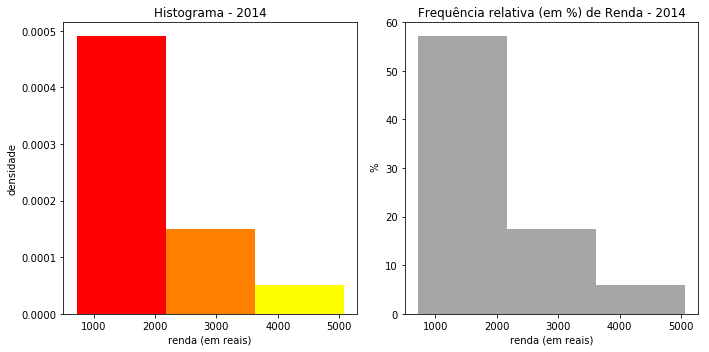

In [39]:
import numpy as n
import matplotlib.pyplot as plt
from numpy import zeros_like

#plotando o histograma
data1 = dados2014.RENDA
faixa = range(724,6516,1448)

fig = plt.figure(figsize=(10,5))

plt.subplot(121)

#colormap
cm = plt.cm.get_cmap('autumn')

n, bins, patches = plt.hist(data1, faixa, normed=1, color='green')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c)) 

plt.ylabel('densidade')
plt.xlabel('renda (em reais)')
plt.title('Histograma - 2014')

#plotando o gráfico de frequências absolutas
plt.subplot(122)

plot = dados2014.RENDA.plot.hist(bins=faixa,color='grey',title='Frequência relativa (em %) de Renda - 2014', weights=zeros_like(dados2014.RENDA)+1./dados2014.RENDA.size*100, alpha=0.7)
plt.ylabel(' %')
plt.xlabel('renda (em reais)')

plt.tight_layout()
plt.show()


In [53]:
#tabela com os valores exatos para uma visualização mais precisa
dados2014.SALARIO.value_counts(True)*100

1-3 salários mínimos    57.114657
Não convém              30.481987
4-6 salários mínimos     9.952295
7-9 salários mínimos     2.451061
Name: SALARIO, dtype: float64

## _Gráficos 2014-2_

Gráficos para a visualização de qual a porcentagem das pessoas que possuem TV's digitais e TV's com antena (dentro de cada faixa salarial).

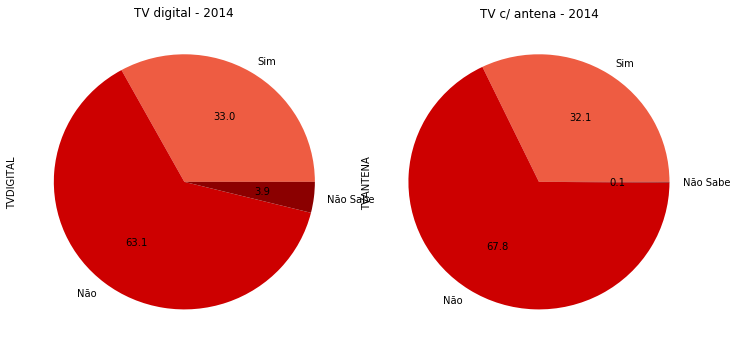

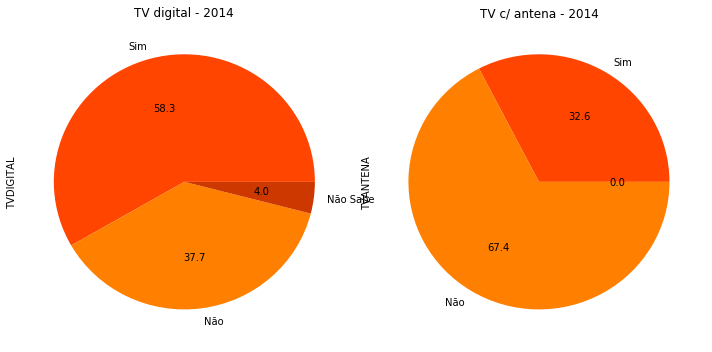

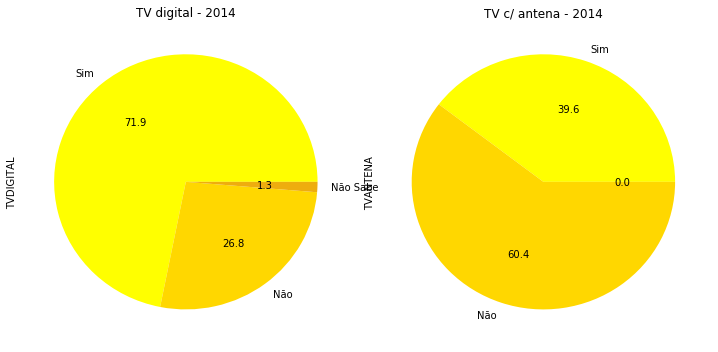

In [40]:
dados20141 = dados2014[(dados2014.RENDA >= 724) & (dados2014.RENDA < 2172)]

tv_aberta1 = (dados20141.TVDIGITAL.value_counts(sort=False, normalize=True)*100).round(decimals=1)

tv_antena1 = (dados20141.TVANTENA.value_counts(sort=False, normalize=True)*100).round(decimals=1)

dados20142 = dados2014[(dados2014.RENDA >= 2896) & (dados2014.RENDA < 4344)]

tv_aberta2 = (dados20142.TVDIGITAL.value_counts(sort=False, normalize=True)*100).round(decimals=1)

tv_antena2 = (dados20142.TVANTENA.value_counts(sort=False, normalize=True)*100).round(decimals=1)

dados20143 = dados2014[(dados2014.RENDA >= 5068) & (dados2014.RENDA < 6516)]

tv_aberta3 = (dados20143.TVDIGITAL.value_counts(sort=False, normalize=True)*100).round(decimals=1)

tv_antena3 = (dados20143.TVANTENA.value_counts(sort=False, normalize=True)*100).round(decimals=1)

#plotando o gráfico pie de tv digital(1-3 salários)
fig = plt.figure(figsize=(10, 5))

plt.subplot(121)
plot = tv_aberta1.plot(kind='pie',title='TV digital - 2014',autopct='%.1f',colors=('#EE5C42','#CD0000','#8B0000'))

#plotando o gráfico pie de tv com antena(1-3 salários)
plt.subplot(122)
plot = tv_antena1.plot(kind='pie',title='TV c/ antena - 2014',autopct='%.1f',colors=('#EE5C42','#CD0000','#8B0000'))

plt.tight_layout()
plt.show()

#plotando o gráfico pie de tv digital(4-6 salários)
fig = plt.figure(figsize=(10, 5))

plt.subplot(121)
plot = tv_aberta2.plot(kind='pie',title='TV digital - 2014',autopct='%.1f',colors=('#FF4500','#FF7F00','#CD3700'))

#plotando o gráfico pie de tv com antena(4-6 salários)
plt.subplot(122)
plot = tv_antena2.plot(kind='pie',title='TV c/ antena - 2014',autopct='%.1f',colors=('#FF4500','#FF7F00','#CD3700'))

plt.tight_layout()
plt.show()

#plotando o gráfico pie de tv digital(7-9 salários)
fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plot = tv_aberta3.plot(kind='pie',title='TV digital - 2014',autopct='%.1f',colors=('#FFFF00','#FFD700','#EEAD0E'))

#plotando o gráfico pie de tv com antena(7-9 salários)
plt.subplot(132)
plot = tv_antena3.plot(kind='pie',title='TV c/ antena - 2014',autopct='%.1f',colors=('#FFFF00','#FFD700','#EEAD0E'))

plt.tight_layout()
plt.show()

## _Tabela Atualizada - 2015_

In [41]:
#delimitando a tabela com os dados que eu quero
dados2015 = dados2015.loc[(dados2015.UF==29) & (dados2015.V0202==2) & (dados2015.V4105==1),["UF","V0202","V0207","V4105","V0226","V02273","V02274","V4614"]]

#transformando int em categoria
dados2015.UF = dados2015.UF.astype("category")
dados2015.V0202 = dados2015.V0202.astype("category")
dados2015.V0207 = dados2015.V0202.astype("category")
dados2015.V4105 = dados2015.V4105.astype("category")
dados2015.V0226 = dados2015.V0226.astype("category")
dados2015.V02273 = dados2015.V02273.astype("category")
dados2015.V02274 = dados2015.V02274.astype("category")


#renomeando as linhas
dados2015.UF.cat.categories = ("Bahia")
dados2015.V0202.cat.categories = ("Casa")
dados2015.V0207.cat.categories = ("Próprio")
dados2015.V4105.cat.categories = ("Urbana")
dados2015.V0226.cat.categories = ("Sim","Não")
dados2015.V02273.cat.categories = ("Sim","Não","Não Sabe")
dados2015.V02274.cat.categories = ("Sim","Não","Não Sabe")

#renomemando as colunas
dados2015 = dados2015.rename(columns={"UF":"REGIAO","V4614": "RENDA","V0202":"DOMICILIO","V0207":"CONDOCUP","V4105":"AREA","V0226":"TVCOR","V02273":"TVDIGITAL","V02274":"TVANTENA"})

dados2015 = dados2015[pd.notnull(dados2015["TVDIGITAL"])]
dados2015 = dados2015[pd.notnull(dados2015["TVANTENA"])]
dados2015 = dados2015[dados2015.RENDA<9999999999]

dados2015.loc[(dados2015.RENDA >= 788) & (dados2015.RENDA < 2364),'SALARIO'] = '1-3 salários mínimos'
dados2015.loc[(dados2015.RENDA >= 3152) & (dados2015.RENDA < 4728),'SALARIO'] = '4-6 salários mínimos'
dados2015.loc[(dados2015.RENDA >= 5516) & (dados2015.RENDA < 7092),'SALARIO'] = '7-9 salários mínimos'
dados2015.loc[(dados2015.RENDA >= 2364) & (dados2015.RENDA < 3152),'SALARIO'] = 'Não convém'
dados2015.loc[(dados2015.RENDA >= 4728) & (dados2015.RENDA < 5516),'SALARIO'] = 'Não convém'
dados2015.loc[(dados2015.RENDA < 788),'SALARIO'] = 'Não convém'
dados2015.loc[(dados2015.RENDA > 7092),'SALARIO'] = 'Não convém'

dados2015               

,REGIAO,DOMICILIO,CONDOCUP,AREA,TVCOR,TVDIGITAL,TVANTENA,RENDA,SALARIO
53018,Bahia,Casa,Próprio,Urbana,Sim,Não,Sim,3279.0,4-6 salários mínimos
53020,Bahia,Casa,Próprio,Urbana,Sim,Não,Sim,788.0,1-3 salários mínimos
53021,Bahia,Casa,Próprio,Urbana,Sim,Não,Não,1576.0,1-3 salários mínimos
53022,Bahia,Casa,Próprio,Urbana,Sim,Não,Sim,4750.0,Não convém
53023,Bahia,Casa,Próprio,Urbana,Sim,Não,Sim,1188.0,1-3 salários mínimos
53024,Bahia,Casa,Próprio,Urbana,Sim,Não,Sim,7450.0,Não convém
53025,Bahia,Casa,Próprio,Urbana,Sim,Não,Sim,3900.0,4-6 salários mínimos
53026,Bahia,Casa,Próprio,Urbana,Sim,Não,Não,312.0,Não convém
53027,Bahia,Casa,Próprio,Urbana,Sim,Não,Sim,1576.0,1-3 salários mínimos
53028,Bahia,Casa,Próprio,Urbana,Sim,Não,Sim,788.0,1-3 salários mínimos


## _Gráficos  2015-1_

Gráficos para a visualização de qual a densidade/porcentagem da população que está inserida em cada faixa salarial.

Salário mínimo de 2015: **R$ 788,00**




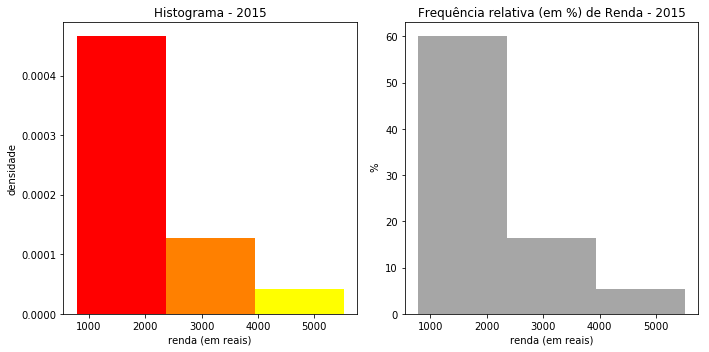

In [42]:
import numpy as n
import matplotlib.pyplot as plt
from numpy import zeros_like

#plotando o histograma
data1 = dados2015.RENDA
faixa = range(788,7092,1576)

fig = plt.figure(figsize=(10,5))

plt.subplot(121)

#colormap
cm = plt.cm.get_cmap('autumn')

n, bins, patches = plt.hist(data1, faixa, normed=1, color='green')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c)) 

plt.ylabel('densidade')
plt.xlabel('renda (em reais)')
plt.title('Histograma - 2015')


#plotando o gráfico de frequências absolutas
plt.subplot(122)

plot = dados2015.RENDA.plot.hist(bins=faixa,color='grey',title='Frequência relativa (em %) de Renda - 2015', weights=zeros_like(dados2015.RENDA)+1./dados2015.RENDA.size*100, alpha=0.7)
plt.ylabel(' %')
plt.xlabel('renda (em reais)')

plt.tight_layout()
plt.show()

In [55]:
#tabela com os valores exatos para uma visualização mais precisa
dados2015.SALARIO.value_counts(True)*100

1-3 salários mínimos    60.010329
Não convém              28.955070
4-6 salários mínimos     8.779480
7-9 salários mínimos     2.255121
Name: SALARIO, dtype: float64

## _Gráficos 2015-2_

Gráficos para a visualização de qual a porcentagem das pessoas que possuem TV's digitais e TV's com antena (dentro de cada faixa salarial).

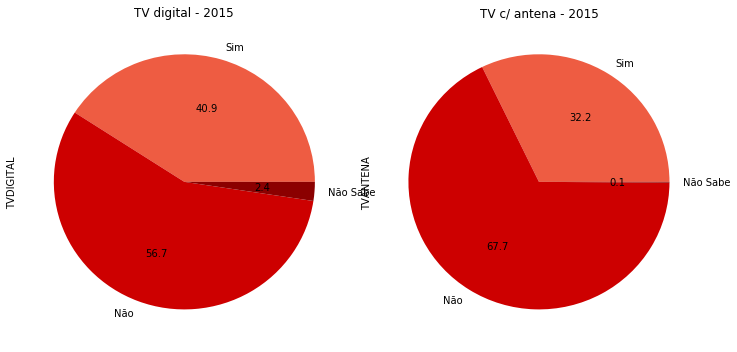

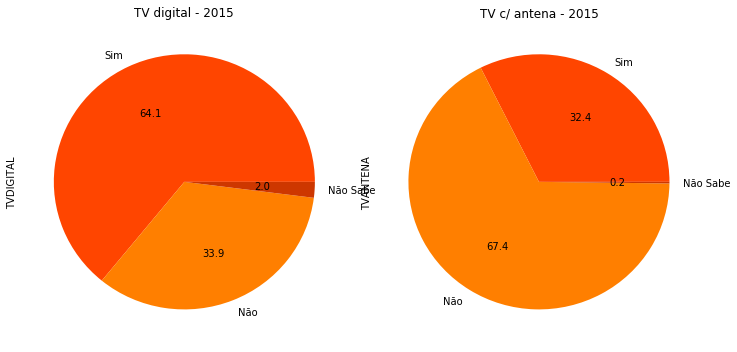

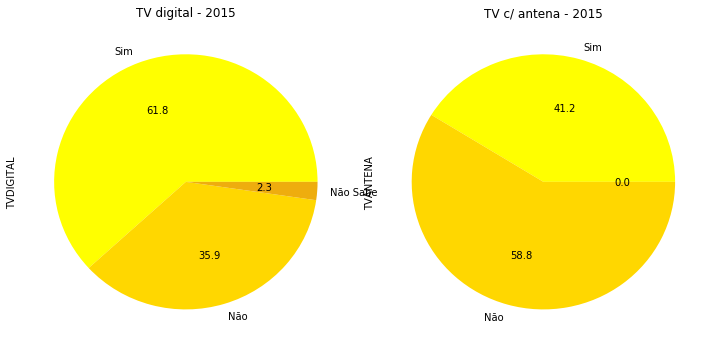

In [87]:
dados20151 = dados2015[(dados2015.RENDA >= 788) & (dados2015.RENDA < 2364)]

tv_aberta1 = (dados20151.TVDIGITAL.value_counts(sort=False, normalize=True)*100).round(decimals=1)

tv_antena1 = (dados20151.TVANTENA.value_counts(sort=False, normalize=True)*100).round(decimals=1)

dados20152 = dados2015[(dados2015.RENDA >= 3152) & (dados2015.RENDA < 4728)]

tv_aberta2 = (dados20152.TVDIGITAL.value_counts(sort=False, normalize=True)*100).round(decimals=1)

tv_antena2 = (dados20152.TVANTENA.value_counts(sort=False, normalize=True)*100).round(decimals=1)

dados20153 = dados2015[(dados2015.RENDA >= 5516) & (dados2015.RENDA < 7092)]

tv_aberta3 = (dados20153.TVDIGITAL.value_counts(sort=False, normalize=True)*100).round(decimals=1)

tv_antena3 = (dados20153.TVANTENA.value_counts(sort=False, normalize=True)*100).round(decimals=1)

#plotando o gráfico pie de tv digital(1-3 salários)
fig = plt.figure(figsize=(10, 5))

plt.subplot(121)
plot = tv_aberta1.plot(kind='pie',title='TV digital - 2015',autopct='%.1f',colors=('#EE5C42','#CD0000','#8B0000'))

#plotando o gráfico pie de tv com antena(1-3 salários)
plt.subplot(122)
plot = tv_antena1.plot(kind='pie',title='TV c/ antena - 2015',autopct='%.1f',colors=('#EE5C42','#CD0000','#8B0000'))

plt.tight_layout()
plt.show()

#plotando o gráfico pie de tv digital(4-6 salários)
fig = plt.figure(figsize=(10, 5))

plt.subplot(121)
plot = tv_aberta2.plot(kind='pie',title='TV digital - 2015',autopct='%.1f',colors=('#FF4500','#FF7F00','#CD3700'))

#plotando o gráfico pie de tv com antena(4-6 salários)
plt.subplot(122)
plot = tv_antena2.plot(kind='pie',title='TV c/ antena - 2015',autopct='%.1f',colors=('#FF4500','#FF7F00','#CD3700'))

plt.tight_layout()
plt.show()

#plotando o gráfico pie de tv digital(7-9 salários)
fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plot = tv_aberta3.plot(kind='pie',title='TV digital - 2015',autopct='%.1f',colors=('#FFFF00','#FFD700','#EEAD0E'))

#plotando o gráfico pie de tv com antena(7-9 salários)
plt.subplot(132)
plot = tv_antena3.plot(kind='pie',title='TV c/ antena - 2015',autopct='%.1f',colors=('#FFFF00','#FFD700','#EEAD0E'))

plt.tight_layout()
plt.show()

## _Gráficos de comparação entre anos_

### _Comparação entre porcentagem de cada faixa salarial por população_
#### (visualização da distribuição de renda através dos anos)

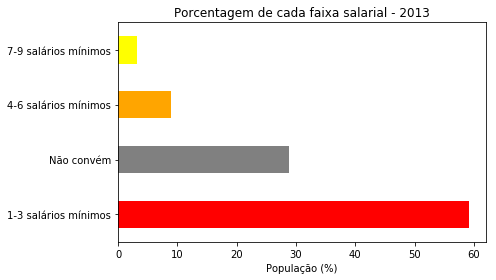

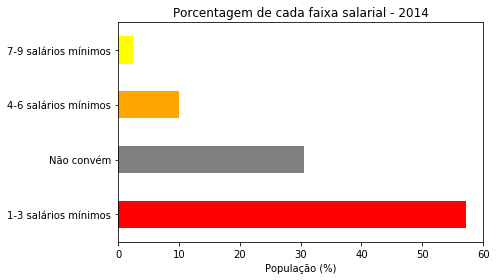

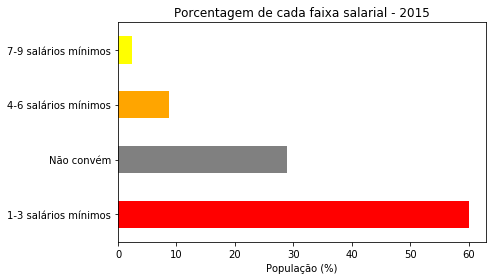

In [44]:
#plotando gráficos da nova variável

sal13 = ((dados2013.SALARIO.value_counts(True)*100).round(decimals=1))

sal14 = ((dados2014.SALARIO.value_counts(True)*100).round(decimals=1))

sal15 = ((dados2015.SALARIO.value_counts(True)*100).round(decimals=1))

fig = plt.figure(figsize=(7,4))

plot = sal13.plot(kind='barh',title='Porcentagem de cada faixa salarial - 2013',color=('red','grey','orange','yellow'))
plt.xlabel('População (%)')

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(7,4))

plot = sal14.plot(kind='barh',title='Porcentagem de cada faixa salarial - 2014',color=('red','grey',"orange",'yellow'))
plt.xlabel('População (%)')

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(7,4))

plot = sal15.plot(kind='barh',title='Porcentagem de cada faixa salarial - 2015',color=('red','grey',"orange",'yellow'))
plt.xlabel('População (%)')

plt.tight_layout()
plt.show()


### _Comparação de porcentagem da população que possui TV digital_

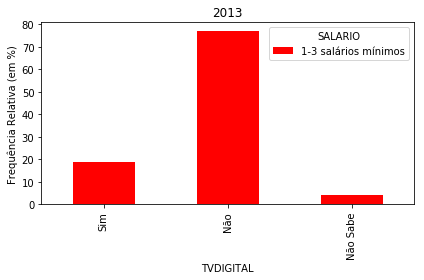

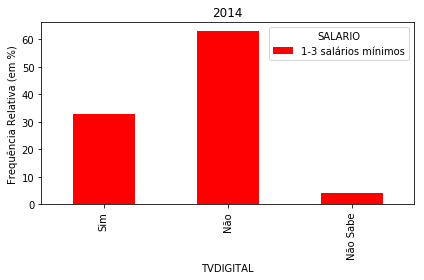

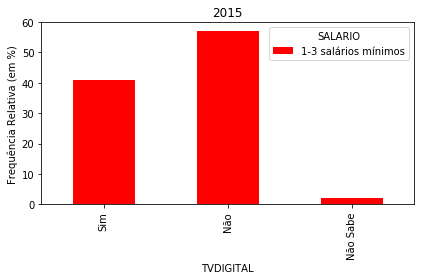

In [45]:
c131 = pd.crosstab(dados20131.TVDIGITAL,dados20131.SALARIO)
c141 = pd.crosstab(dados20141.TVDIGITAL,dados20141.SALARIO)
c151 = pd.crosstab(dados20151.TVDIGITAL,dados20151.SALARIO)

c131 = (c131/c131.sum().sum()*100).round(decimals=0)
c131.plot(kind='bar',color='r')
plt.ylabel('Frequência Relativa (em %)')
plt.title('2013')

plt.tight_layout()
plt.show()

c141 = (c141/c141.sum().sum()*100).round(decimals=0)
c141.plot(kind='bar',color='r')
plt.ylabel('Frequência Relativa (em %)')
plt.title('2014')

plt.tight_layout()
plt.show()

c151 = (c151/c151.sum().sum()*100).round(decimals=0)
c151.plot(kind='bar',color='r')
plt.ylabel('Frequência Relativa (em %)')
plt.title('2015')

plt.tight_layout()
plt.show()

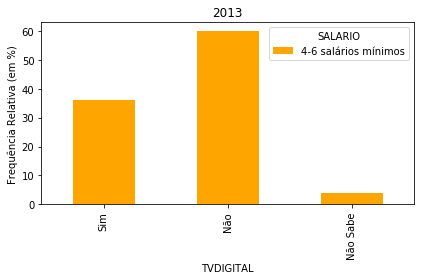

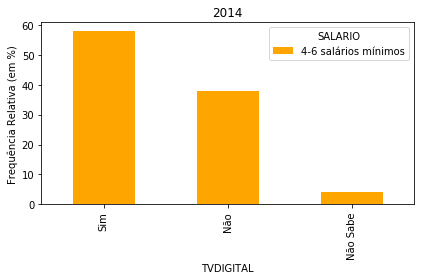

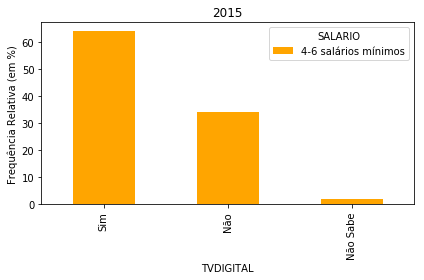

In [46]:
c132 = pd.crosstab(dados20132.TVDIGITAL,dados20132.SALARIO)
c142 = pd.crosstab(dados20142.TVDIGITAL,dados20142.SALARIO)
c152 = pd.crosstab(dados20152.TVDIGITAL,dados20152.SALARIO)

c132 = (c132/c132.sum().sum()*100).round(decimals=0)
c132.plot(kind='bar',color='orange')
plt.ylabel('Frequência Relativa (em %)')
plt.title('2013')

plt.tight_layout()
plt.show()

c142 = (c142/c142.sum().sum()*100).round(decimals=0)
c142.plot(kind='bar',color='orange')
plt.ylabel('Frequência Relativa (em %)')
plt.title('2014')

plt.tight_layout()
plt.show()

c152 = (c152/c152.sum().sum()*100).round(decimals=0)
c152.plot(kind='bar',color='orange')
plt.ylabel('Frequência Relativa (em %)')
plt.title('2015')

plt.tight_layout()
plt.show()

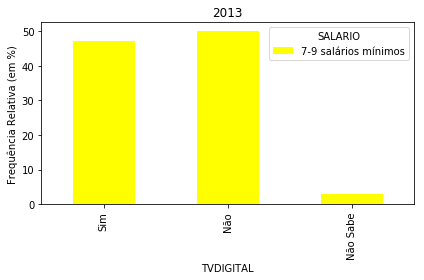

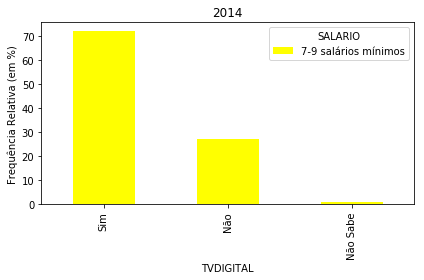

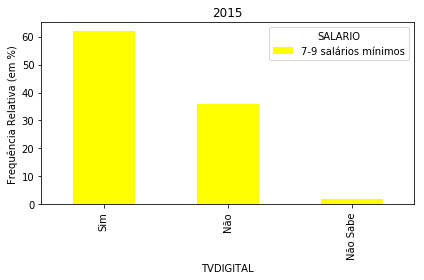

In [47]:
c133 = pd.crosstab(dados20133.TVDIGITAL,dados20133.SALARIO)
c143 = pd.crosstab(dados20143.TVDIGITAL,dados20143.SALARIO)
c153 = pd.crosstab(dados20153.TVDIGITAL,dados20153.SALARIO)

c133 = (c133/c133.sum().sum()*100).round(decimals=0)
c133.plot(kind='bar',color='yellow')
plt.ylabel('Frequência Relativa (em %)')
plt.title('2013')

plt.tight_layout()
plt.show()

c143 = (c143/c143.sum().sum()*100).round(decimals=0)
c143.plot(kind='bar',color='yellow')
plt.ylabel('Frequência Relativa (em %)')
plt.title('2014')

plt.tight_layout()
plt.show()

c153 = (c153/c153.sum().sum()*100).round(decimals=0)
c153.plot(kind='bar',color='yellow')
plt.ylabel('Frequência Relativa (em %)')
plt.title('2015')

plt.tight_layout()
plt.show()

### _Comparação de porcentagem da população que possui TV com antena_

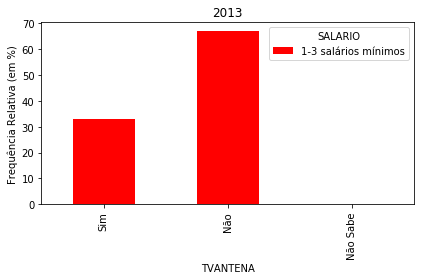

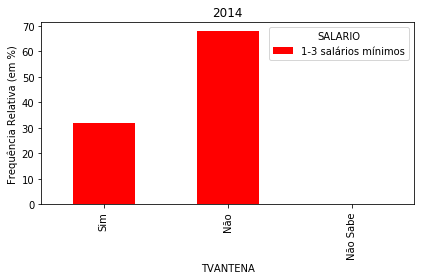

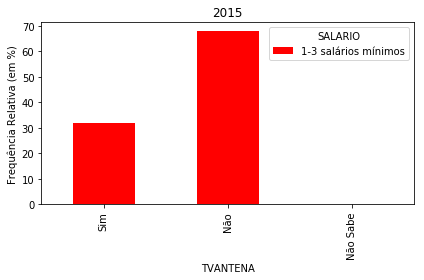

In [48]:
c131 = pd.crosstab(dados20131.TVANTENA,dados20131.SALARIO)
c141 = pd.crosstab(dados20141.TVANTENA,dados20141.SALARIO)
c151 = pd.crosstab(dados20151.TVANTENA,dados20151.SALARIO)

c131 = (c131/c131.sum().sum()*100).round(decimals=0)
c131.plot(kind='bar',color='r')
plt.ylabel('Frequência Relativa (em %)')
plt.title('2013')

plt.tight_layout()
plt.show()

c141 = (c141/c141.sum().sum()*100).round(decimals=0)
c141.plot(kind='bar',color='r')
plt.ylabel('Frequência Relativa (em %)')
plt.title('2014')

plt.tight_layout()
plt.show()

c151 = (c151/c151.sum().sum()*100).round(decimals=0)
c151.plot(kind='bar',color='r')
plt.ylabel('Frequência Relativa (em %)')
plt.title('2015')

plt.tight_layout()
plt.show()

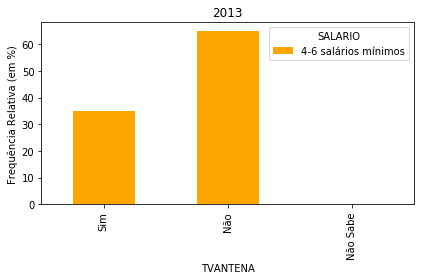

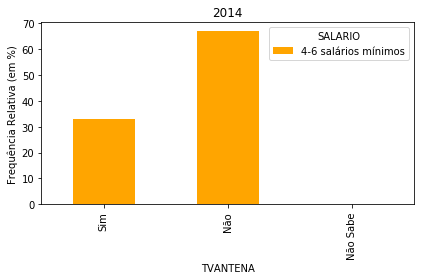

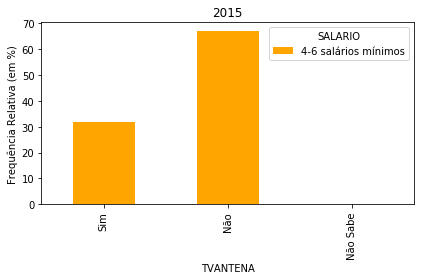

In [49]:
c132 = pd.crosstab(dados20132.TVANTENA,dados20132.SALARIO)
c142 = pd.crosstab(dados20142.TVANTENA,dados20142.SALARIO)
c152 = pd.crosstab(dados20152.TVANTENA,dados20152.SALARIO)

c132 = (c132/c132.sum().sum()*100).round(decimals=0)
c132.plot(kind='bar',color='orange')
plt.ylabel('Frequência Relativa (em %)')
plt.title('2013')

plt.tight_layout()
plt.show()

c142 = (c142/c142.sum().sum()*100).round(decimals=0)
c142.plot(kind='bar',color='orange')
plt.ylabel('Frequência Relativa (em %)')
plt.title('2014')

plt.tight_layout()
plt.show()

c152 = (c152/c152.sum().sum()*100).round(decimals=0)
c152.plot(kind='bar',color='orange')
plt.ylabel('Frequência Relativa (em %)')
plt.title('2015')

plt.tight_layout()
plt.show()

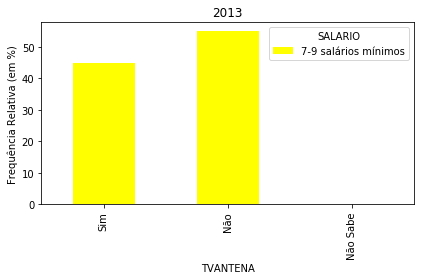

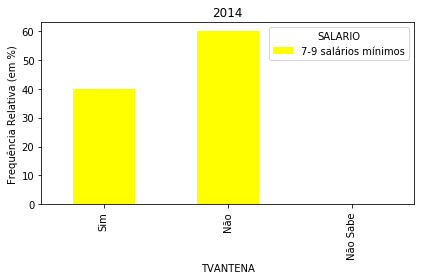

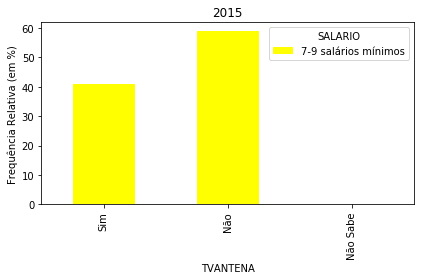

In [50]:
c133 = pd.crosstab(dados20133.TVANTENA,dados20133.SALARIO)
c143 = pd.crosstab(dados20143.TVANTENA,dados20143.SALARIO)
c153 = pd.crosstab(dados20153.TVANTENA,dados20153.SALARIO)

c133 = (c133/c133.sum().sum()*100).round(decimals=0)
c133.plot(kind='bar',color='yellow')
plt.ylabel('Frequência Relativa (em %)')
plt.title('2013')

plt.tight_layout()
plt.show()

c143 = (c143/c143.sum().sum()*100).round(decimals=0)
c143.plot(kind='bar',color='yellow')
plt.ylabel('Frequência Relativa (em %)')
plt.title('2014')

plt.tight_layout()
plt.show()

c153 = (c153/c153.sum().sum()*100).round(decimals=0)
c153.plot(kind='bar',color='yellow')
plt.ylabel('Frequência Relativa (em %)')
plt.title('2015')

plt.tight_layout()
plt.show()

___
## Conclusão 

Por meio desta análise foi possível extrair algumas constatações sobre a compra de TVs ao longo do tempo na Bahia.

### 2013 - TV digital


In [78]:
#dado bruto de quantas pessoas estão em cada faixa

dados2013.SALARIO.value_counts().round(decimals=1)

1-3 salários mínimos    2473
Não convém              1203
4-6 salários mínimos     373
7-9 salários mínimos     133
Name: SALARIO, dtype: int64

- 19.4% das pessoas inseridas na faixa salarial de 1-3 possuiam TV digital.

__479.75 pessoas__

- 35.9% das pessoas inseridas na faixa salarial de 4-6 possuiam TV digital.

__133.9 pessoas__

- 46.6% das pessoas inseridas na faixa salarial de 7-9 possuiam TV digital.

__61.9 pessoas__

Por meio da comparação entre as faixas salariais, fica visível que quanto maior a renda, maior a porcentagem de pessoas que possui uma TV digital. Tal constatação não é nenhuma novidade, visto que quanto mais dinheiro, maior a possibilidade de compra de um produto. Porém, quando há uma comparação com os outros anos, o resultado obtido é interessante.

### 2014 - TV digital

In [79]:
#dado bruto de quantas pessoas estão em cada faixa

dados2014.SALARIO.value_counts().round(decimals=1)

1-3 salários mínimos    3472
Não convém              1853
4-6 salários mínimos     605
7-9 salários mínimos     149
Name: SALARIO, dtype: int64

- 33.0% das pessoas inseridas na faixa salarial de 1-3 possuiam TV digital.

__1145.7 pessoas__

- 58.3% das pessoas inseridas na faixa salarial de 4-6 possuiam TV digital.

__352,7 pessoas__

- 71.9% das pessoas inseridas na faixa salarial de 7-9 possuiam TV digital.

__107,1 pessoas__

### 2015 -TV digital


In [80]:
#dado bruto de quantas pessoas estão em casa faixa

dados2015.SALARIO.value_counts().round(decimals=1)

1-3 salários mínimos    3486
Não convém              1682
4-6 salários mínimos     510
7-9 salários mínimos     131
Name: SALARIO, dtype: int64

- 40.9% das pessoas inseridas na faixa salarial de 1-3 possuiam TV digital.

__1425.7 pessoas__

- 64.9% das pessoas inseridas na faixa salarial de 4-6 possuiam TV digital.

__331 pessoas__

- 61.8% das pessoas inseridas na faixa salarial de 7-9 possuiam TV digital.

__80.96 pessoas__

### Análise

Através da análise do projeto e das informações compiladas acima, percebe-se que ao longo dos anos de 2013 até 2015, o consumo de TV digital de pessoas que moram em casas próprias na área urbana da Bahia cresceu. Isso aplica-se para todos as faixas salariais e intervalos de tempo, exceto para a faixa salarial de 4-6 e 7-9 salários mínimos de 2014 para 2015, quando há um decréscimo desse consumo. 

O crescimento no consumo de TV digital entre 2013 e 2014 pode ser evidenciado pelo crescimento de 6,78% do salário mínimo contra um acrescésimo pequeno no IPCA amplo - inflação oficial do país (2013: 5.91% e 2014: 6,41%).

Apesar do fato de que a economia brasileira cresceu somente 0.1% em 2014, segundo o IBGE, significando que, em valores correntes (reais), a soma das riquezas produzidas no ano de 2014 chegou a 5.52 trilhões de reais, e o PIB per capita (por pessoa) caiu a 27.229 reais, sendo o pior resultado desde 2009, ano da crise internacional - quando a economia recuou 0.2% - o setor de serviços encerrou 2014 com crescimento de 6%, visível no aumento da porcentagem de pessoas que tem TV com sinal digital de 2013 até 2014.

As taxas de serviços de informação e comunicação tiveram um crescimento de 3,4% em relação ao ano anterior. Dentro desse segmento, serviços de tecnologia da informação cresceram 2,9%, e serviços audiovisuais, de edição e agências de notícias, 6,3%.

link das matérias:
https://br.advfn.com/indicadores/ipca
http://g1.globo.com/economia/noticia/2015/03/economia-brasileira-cresce-01-em-2014-diz-ibge.html
http://g1.globo.com/economia/noticia/2015/02/setor-de-servicos-cresceu-6-em-2014-diz-ibge.html


O decréscimo do consumo de TV digital da área urbana da Bahia, nas faixas salariais de 4-6 e 7-9 salários mínimos entre 2014 e 2015, pode ser evidenciado pelo fato de que, em termos de Produto Interno Bruto (PIB), a retração da economia brasileira em 2015 (-3.8%) foi o pior resultado em 25 anos, ou seja, desde 1990 – quando houve retração de 4,35%. Isso culmina em um crescimento do IPCA, que foi de 10,67%. 

O setor de prestação de serviços, que detém a maior participação no PIB (quase 70%), foi amplamente afetado. Em outubro de 2015 (último dado divulgado), a queda no setor de serviços (-5,8%) foi a maior já registrada na série iniciada em 2012. O volume de serviços, medido pela receita, recuou ao menor patamar para o mês desde outubro de 2012, visível na diminuição da porcentagem de pessoas que tem TV com sinal digital de 2014 até 2015.

Tal retração na economia também resultou em uma perda de, em 12 meses, mais de 1,3 milhão de empregos, sendo 17.630 desses empregos no Nordeste, afetando o poder aquisitivo da população de maneira negativa e influenciando uma mobilidade social vertical descendente, ou seja, pessoas da classe D migraram para a classe E. Por conta dessa migração social, pessoas que no ano de 2014 estavam inseridas na faixa salarial de 4-6 salários mínimos agora estão inseridas na faixa de 1-3, ou entre a faixa de 4-6 e 1-3 ("Não Convém"), explicando o aumento de frequências absolutas dessa faixa entre estes anos. Esse fenômeno interprete e explica o fato de que houve um crescimento na porcentagem de pessoas que tem TV digital entre a faixa salarial de 1-3 de 2014 para 2015

link das matérias:
http://g1.globo.com/economia/noticia/2016/01/inflacao-oficial-fica-em-1067-em-2015.html
http://g1.globo.com/economia/noticia/2015/12/economia-em-2015-o-ano-em-que-o-brasil-andou-para-tras.html
http://g1.globo.com/economia/noticia/2015/11/pais-fecha-169-mil-vagas-em-outubro-pior-resultado-para-o-mes-desde-1992.html

### 2013 - TV com antena


- 32.9% das pessoas inseridas na faixa salarial de 1-3 possuiam TV com antena.

__813.6 pessoas__

- 34.9% das pessoas inseridas na faixa salarial de 4-6 possuiam TV com antena.

__130.1 pessoas__

- 45.1% das pessoas inseridas na faixa salarial de 7-9 possuiam TV com antena.

__59.98 pessoas__

### 2014 - TV com antena

- 32.1% das pessoas inseridas na faixa salarial de 1-3 possuiam TV com antena.

__1114.5 pessoas__

- 32.6% das pessoas inseridas na faixa salarial de 4-6 possuiam TV com antena.

__197.23 pessoas__

- 39.6% das pessoas inseridas na faixa salarial 7-9 possuiam TV com antena

__59 pessoas__


### 2015 - TV com antena

- 32.3% das pessoas inseridas na faixa salarial de 1-3 possuiam TV com antena

__1125.9 pessoas__

- 32.4% das pessoas inseridas na faixa salarial de 4-6 possuiam TV com antena

__165.4 pessoas__

- 41.2% das pessoas inseridas na faixa salarial 7-9 possuiam TV com antena

__53.9 pessoas__

#### Análise

O crescimento ou decrescimento do consumo de TV com antena em casas próprias da zona urbana da Bahia é praticamente nulo, uma vez que os valores percentuais são estáveis quando comparados por faixas salariais e entre os anos 2013 -2015. Isso acontece porque há novos e melhores tipos de TV no mercado, como por exemplo a TV digital, estagnando a utilização e consequentemente o consumo da TV com antena. Está cada vez mais próximo o prazo de desligamento total do sinal analógico porque o seu espectro de frequências será usado por operadoras para aumentar a oferta de redes 4G na faixa de 700 MHz, contribuindo ainda mais para tal estagnação.

link da matéria:
https://tecnologia.uol.com.br/noticias/redacao/2015/06/01/com-fim-gradual-de-sinal-analogico-saiba-o-que-fazer-para-usar-tv-digital.htm?cmpid=copiaecola